# **IMPORT LIBRARIES**

In [86]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

warnings.filterwarnings('ignore')


# **LOAD DATASET**

In [ ]:
train_path = r"C:\Users\chand\Downloads\Brain Tumor Prediction System\Data\Training"
test_path  = r"C:\Users\chand\Downloads\Brain Tumor Prediction System\Data\Testing"


classes = {
    'notumor': 0,
    'pituitary': 1
}

IMG_SIZE = 200

In [88]:
# Load TRAINING data
X_train = []
y_train = []

for cls, label in classes.items():
    folder = os.path.join(train_path, cls)

    for img_name in os.listdir(folder):
        img_path = os.path.join(folder, img_name)

        img = cv2.imread(img_path, 0)
        if img is None:
            continue

        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        X_train.append(img)
        y_train.append(label)

X_train = np.array(X_train)
y_train = np.array(y_train)

print("Training data shape:", X_train.shape)
print(pd.Series(y_train).value_counts())


Training data shape: (3052, 200, 200)
0    1595
1    1457
Name: count, dtype: int64


In [104]:
# Load TESTING data
X_test = []
y_test = []

for cls, label in classes.items():
    folder = os.path.join(test_path, cls)

    for img_name in os.listdir(folder):
        img_path = os.path.join(folder, img_name)

        img = cv2.imread(img_path, 0)
        if img is None:
            continue

        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        X_test.append(img)
        y_test.append(label)

X_test = np.array(X_test)
y_test = np.array(y_test)

print("Testing data shape:", X_test.shape)
print(pd.Series(y_test).value_counts())

Testing data shape: (705, 200, 200)
0    405
1    300
Name: count, dtype: int64


# **Visualizations**

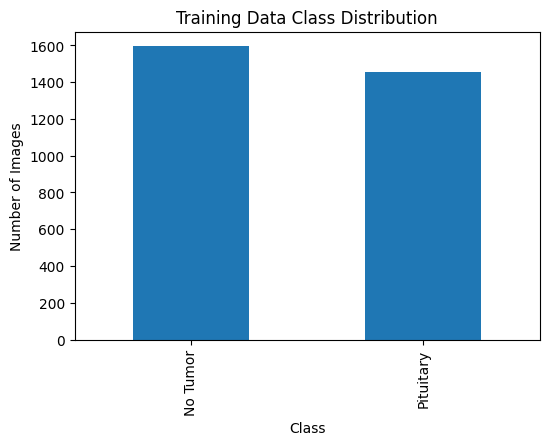

In [105]:
# Class Distribution
plt.figure(figsize=(6,4))
pd.Series(y_train).value_counts().plot(kind='bar')
plt.xticks(ticks=[0,1], labels=['No Tumor', 'Pituitary'])
plt.title("Training Data Class Distribution")
plt.ylabel("Number of Images")
plt.xlabel("Class")
plt.show()


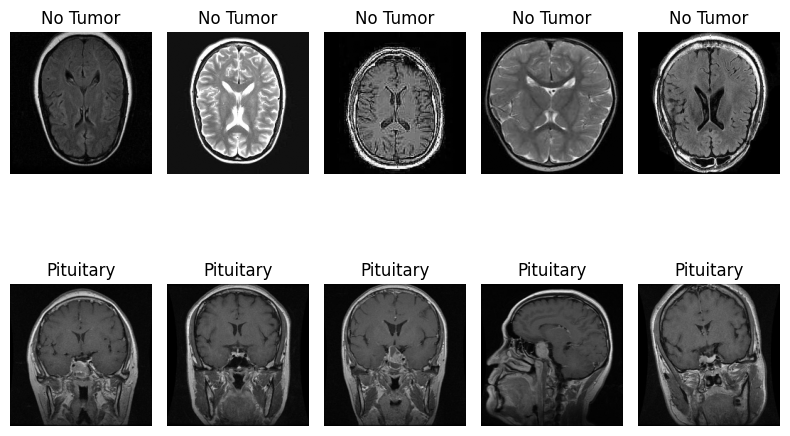

In [106]:
# Visualize sample images
plt.figure(figsize=(8,6))

# Get first 5 samples of each class
no_tumor_samples = np.where(y_train == 0)[0][:5]
tumor_samples = np.where(y_train == 1)[0][:5]

for i, idx in enumerate(no_tumor_samples):
    plt.subplot(2,5,i+1)
    plt.imshow(X_train[idx], cmap='gray')
    plt.title("No Tumor")
    plt.axis('off')

for i, idx in enumerate(tumor_samples):
    plt.subplot(2,5,i+6)
    plt.imshow(X_train[idx], cmap='gray')
    plt.title("Pituitary")
    plt.axis('off')

plt.tight_layout()
plt.show()


# **FLATTEN IMAGES**

In [107]:
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat  = X_test.reshape(X_test.shape[0], -1)

print("Flattened train shape:", X_train_flat.shape)
print("Flattened test shape:", X_test_flat.shape)


Flattened train shape: (3052, 40000)
Flattened test shape: (705, 40000)


# **FEATURE SCALING**

In [108]:
scaler = StandardScaler()

In [109]:
X_train_scaled = scaler.fit_transform(X_train_flat)
X_test_scaled  = scaler.transform(X_test_flat)


# **DIMENSIONALITY REDUCTION**

In [110]:
pca = PCA(n_components=0.98)  # Keep 98% variance

In [111]:


X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca  = pca.transform(X_test_scaled)

print("Features before PCA:", X_train_flat.shape[1])
print("Features after PCA:", X_train_pca.shape[1])


Features before PCA: 40000
Features after PCA: 1153


# **TRAIN MODELS**

**Logistic Regression**

In [112]:
log_model = LogisticRegression(C=0.01, max_iter=1000)
log_model.fit(X_train_pca, y_train)

LogisticRegression(C=0.01, max_iter=1000)

**SVM Classifier**

In [135]:
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True)
svm_model.fit(X_train_pca, y_train)

SVC(probability=True)

# **MODEL EVALUATION**

**Predictions**

In [136]:
log_train_pred = log_model.predict(X_train_pca)
log_test_pred  = log_model.predict(X_test_pca)

In [137]:
svm_train_pred = svm_model.predict(X_train_pca)
svm_test_pred  = svm_model.predict(X_test_pca)

**Accuracy Scores**

In [138]:

log_train_acc = accuracy_score(y_train, log_train_pred)
log_test_acc = accuracy_score(y_test, log_test_pred)


In [139]:
svm_train_acc = accuracy_score(y_train, svm_train_pred)
svm_test_acc = accuracy_score(y_test, svm_test_pred)

In [140]:
print("\n===== MODEL PERFORMANCE =====")
print(f"Logistic Regression - Training Accuracy: {log_train_acc:.4f}")
print(f"Logistic Regression - Testing Accuracy : {log_test_acc:.4f}")
print(f"\nSVM - Training Accuracy: {svm_train_acc:.4f}")
print(f"SVM - Testing Accuracy : {svm_test_acc:.4f}")


===== MODEL PERFORMANCE =====
Logistic Regression - Training Accuracy: 1.0000
Logistic Regression - Testing Accuracy : 0.9986

SVM - Training Accuracy: 0.9993
SVM - Testing Accuracy : 0.9986


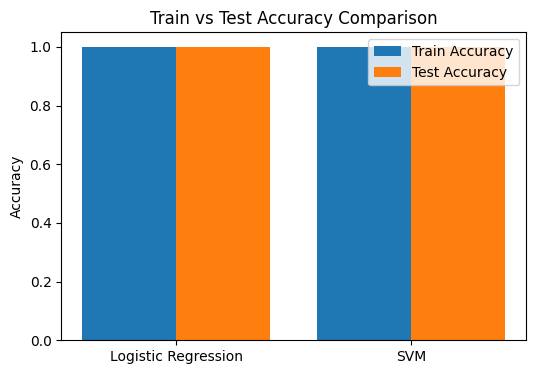

In [141]:
models = ['Logistic Regression', 'SVM']
train_acc = [log_train_acc, svm_train_acc]
test_acc = [log_test_acc, svm_test_acc]

plt.figure(figsize=(6,4))
x = np.arange(len(models))

plt.bar(x - 0.2, train_acc, width=0.4, label='Train Accuracy')
plt.bar(x + 0.2, test_acc, width=0.4, label='Test Accuracy')

plt.xticks(x, models)
plt.ylabel("Accuracy")
plt.title("Train vs Test Accuracy Comparison")
plt.legend()
plt.show()


In [120]:
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, log_test_pred))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       405
           1       1.00      1.00      1.00       300

    accuracy                           1.00       705
   macro avg       1.00      1.00      1.00       705
weighted avg       1.00      1.00      1.00       705



In [122]:
print("\nSVM Classification Report:")
print(classification_report(y_test, svm_test_pred))


SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       405
           1       1.00      1.00      1.00       300

    accuracy                           1.00       705
   macro avg       1.00      1.00      1.00       705
weighted avg       1.00      1.00      1.00       705



In [123]:
cm = confusion_matrix(y_test, svm_test_pred)
print("\nConfusion Matrix:\n", cm)


Confusion Matrix:
 [[404   1]
 [  0 300]]


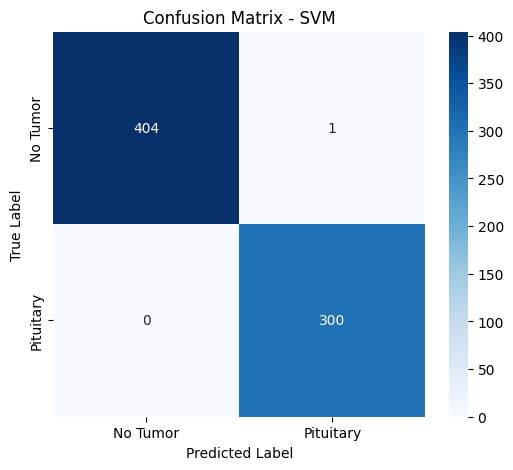

In [124]:
# Confusion Matrix Heatmap

cm = confusion_matrix(y_test, svm_test_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Tumor','Pituitary'],
            yticklabels=['No Tumor','Pituitary'])

plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


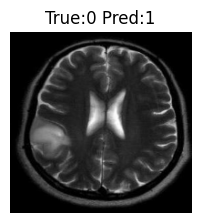

In [125]:
# Misclassified Images

wrong_idx = np.where(y_test != svm_test_pred)[0]

plt.figure(figsize=(8,6))
for i, idx in enumerate(wrong_idx[:8]):
    plt.subplot(2,4,i+1)
    img = X_test[idx].reshape(200,200)
    plt.imshow(img, cmap='gray')
    plt.title(f"True:{y_test[idx]} Pred:{svm_test_pred[idx]}")
    plt.axis('off')

plt.tight_layout()
plt.show()
